# Discrete Fracture Network (DFN) and Oda´s permeability Tensor

Geological units are commonly treated as continuous and homogeneous media, despite significant discontinuities may affect their hydraulic properties. For example, in situ and laboratory measurements highlight significant variability in rock permeability, primarily attributed to the presence of veins, cracks and faults(e.g., see Elkhoury et al., 2011; Lianbo & Xiang-Yang, 2009). The topic is particularly critical as these discontinuities can act as preferential pathways for fluid flow and solute tranport in undesirable scenarios, such as $CO_2$ sequestration or radioactive waste repositories (Viswanathan et al., 2021). 

The primary challenge in modeling fractured rocks lies in accurately representing their complex three-dimensional discontinuity systems. Fractures experience in-situ stress fields at depth, resulting in intricate geometries such as cross-cutting, branching, terminations, bends, spacing variations, and clustering. Obtaining a detailed 3D view of fracture networks is, therefore, impractical considering tha field data typically show one-dimensional markers (e.g., in borehole logging) or two-dimensional elements through outcrop mapping (Lei et al., 2017). 

In response of these challenges, various methods have come to the light to generate and spatially locate fractures in the three-dimensional space. One of the most widely used solutions is the implementation of discrete fracture networks (DFN). The method uses geologic field investigations to create a network of interconnected fractures where the geometry and properties of individual fractures are explicitly represented as lines in two dimensions or planar polygons in three dimensions (Hyman et al., 2015). The generation of this fracture network is done stochastically with multiple realizations, using probabilistic density functions of the geometric parameters of the fractures (i.e., density, orientation, size, aperture, or transmissivity) formulated according to field observations (Jing & Stephansson, 2007). The model also provides a measure of uncertainty and variability for the created elements (Dershowitz, 2000).

However, the DFN method is computationally expensive compared to continuum models because each fracture object is discretized into a finite-element mesh. To overcome this inconvenience, the methodology proposed by Oda (1985) introduced the concept of a crack tensor to upscale the permeability of the medium. This tensor uniquely depends on the geometrical features of the related cracks, such as aperture, size, and orientation. As a result, the approach calculates approximate measures of grid cell effective directional permeability. Since the crack tensor can be created from the DFN, it also addresses the limitations of fracture connectivity.In this notebook, a discrete implementation of Oda´s methodology is demostrated. 


# 1. Processing Geometric Properties of Fractures

Following Oda's methodology (1985), the permeability tensor of any fracture can be calculated based entirely on its aperture, area, and orientation. The fracture aperture is usually assumed to be average and constant across each element, disregarding stress fields or geomechanical variations that could introduce depth-related heterogeneity. The area is determined by identifying the intersection points where the fracture plane intersects the edges of each polyhedral element in the base model's mesh. These intersection points, located within the boundaries of the polyhedral elements, define the vertices of polygons. In the simplest case, where the mesh elements are regular cubes, the intersections create three or more points that collectively form a closed plane (see Figure 1).



 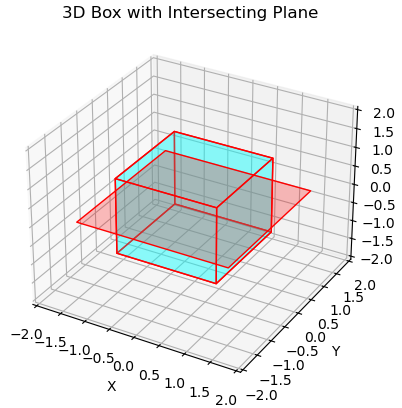 

 Figure 1: Intersection of a horizontal plane with a cubic element


The plane's orientation can be determined through the normal vector of the fracture, which is unique and perpendicular to the plane. This calculation is made using three non-collinear vertices, $P_{1}$, $P_{2}$ and $P_{3}$, belonging to the fracture plane:

\begin{aligned}
\ P_{1} &= (P_{1x}, P_{1y}, P_{1z}) \\ \\
\ P_{2} &= (P_{2x}, P_{2y}, P_{2z}) \\ \\
\ P_{3} &= (P_{3x}, P_{3y}, P_{3z}) \\ \\
\end{aligned}

Using these points, it is possible to construct two nonparallel vectors lying on the plane by taking the their coordinates differences:

\begin{aligned}
\vec{a} &= \vec{P_{1}P_{2}} = (P_{2x} - P_{1x}, P_{2y} - P_{1y}, P_{2z} - P_{1z}) \\ \\
\vec{b} &= \vec{P_{1}P_{3}} = (P_{3x} - P_{1x}, P_{3y} - P_{1y}, P_{3z} - P_{1z}) \\ \\
\vec{a} &= (a_1, a_2, a_3) \\ \\
\vec{b} &= (b_1, b_2, b_3) \\ \\


\end{aligned}

Once the two vectors are constructed, the cross product between these two are computed to get the normal vector $\vec{n}$ of the plane. This vector is then converted into a unit vector by dividing it by its magnitude:


\begin{aligned}

\vec{n} &= \vec{a}  \times  \vec{b} \\ \\

\vec{n} &= \begin{bmatrix}


a_2b_3 - a_3b_2 \\ \\
a_3b_1 - a_1b_3 \\ \\
a_1b_2 - a_2b_1
\end{bmatrix}\\

\hat{n}  &= \frac{\vec{n}} {\|\vec{n}\|}\quad \\
\hat{n} &= \frac{\vec{n}} {\sqrt{\vec{n_{x}}^2 + \vec{n_{y}}^2 + \vec{n_{z}}^2}}\quad
\end{aligned}


# Calculating Permeability tensor for crystalline rocks

Cristalline rocks are known for their extremely low matrix permeability, which hinders the passage of water through them. Instead, fractures act as crucial pathways for water movement, providing conduits that facilitate fluid flow and mass transport (Banks et al., 1996). When excluding the matrix's contribution to fluid flow in these materials, the fracture tensor of an element $F_{ij}$ (i.e., fractured cell), results from:

\begin{aligned}
F_{ij} = \frac{{1}} {V} \sum_{k=1}^{N} A_{k}T_{k}n_{ik}n_{jk} 
\end{aligned}

Where: 
- ${V}$ Cell volume, ($L^3$)
- N represents the number of fractures within the element. Each fracture is indexed by 𝑘 from 1 to 𝑁.
- $A_{k}$ Area of the fracture k, ($L^2$)
- $T_{k}$ Transmissivity of fracture ($L^2/t$)
- $n_{ik}n_{jk} $ are components of the unit normal vector of k, where 𝑖 and 𝑗 denote the spatial directions (i.e., 𝑥, 𝑦, 𝑧). 

The transmissivity of the fracture ${T}$ can be calculated using the cubic law geometrical model, which computes laminar flow between parallel planar plates based on the fracture aperture ${b}$, as described by Witherspoon et al. (1980):

\begin{aligned}
{T} = \frac{{b}^3} {12} 
\end{aligned}

Likewwise. the components of the unit normal vector can be rearranged in a 3×3 matrix to calculate each components of the permeability tensor: 

\begin{aligned}

\vec{n} &= \begin{pmatrix}
{\vec{n}_x}^2 & \vec{n}_x\vec{n}_y & \vec{n}_x\vec{n}_z \\
\vec{n}_y\vec{n}_x & {\vec{n}_y}^2 & \vec{n}_y\vec{n}_z \\
\vec{n}_z\vec{n}_x & \vec{n}_z\vec{n}_y & {\vec{n}_z}^2 \\
\end{pmatrix}


\end{aligned}

Once the fracture tensor $F_{ij}$ has been calculated, it needs to be rotated to align parallel to the normal vector. This step ensures that the model's permeability reaches its maximum when aligned with the fracture plane and becomes zero when perpendicular to it. The resulting permeability tensor of the fractured rock, $K_{ij}$, is then applied to each grid element of the model:

\begin{aligned}
\\K_{ij} &= \lambda \left( F_{kk} \delta_{ij} - F_{ij} \right)
\end{aligned}

Where:
- $\lambda$ dimensionless constant increasing with the fracture size with 0 $\leq$ $\lambda$ $\leq$ 1/12 (The latter for areas with interconected fractures and elements large enough to conduct water)
- $\delta_{ij}$ Kronecker delta (it equals 1 when the indices i and 𝑗 are equal, and 0 otherwise)
- $F_{kk}$ sum of the diagonals components of $F_{ij}$ (i.e., $F_{11}$ + $F_{22}$ + $F_{33}$) 
- $F_{ij}$ fracture tensor, (${L/t}$). After rotated, it expresses fracture flow as a vector along the fracture’s unit normal.


# Practical Example 

The following Python script, included in the full deliverable code, demonstrates the calculation of both the fracture tensor and permeability tensor for a horizontal fracture with a constant aperture of 3mm. This fracture penetrates a cubic block with a volume of 1 cubic meter, which in turn generates a plane area of 1 ${{m}^2}$. From the results, note that the permeability tensor $K_{ij}$ has its maximum values in the x and y components while it is 0 in the z component.

In [1]:
import numpy as np

# Example usage
volume = 1.0  # Volume of the element in m^3
area = 1.0  # Fracture area in m^2
normal_vector = np.array([0, 0, 1])  # Unit normal vector for the fracture
aperture = 0.003  # Fracture aperture in meters

# Function to calculate permeability tensor for a given fracture
def calculate_permeability_tensor(volume, area, normal_vector, aperture):
    # Calculate transmissivity
    transmissivity = (aperture ** 3) / 12

    # Calculate permeability tensor components
    Fxx = (area * transmissivity * normal_vector[0] ** 2) / volume
    Fyy = (area * transmissivity * normal_vector[1] ** 2) / volume
    Fzz = (area * transmissivity * normal_vector[2] ** 2) / volume
    Fxy = (area * transmissivity * normal_vector[0] * normal_vector[1]) / volume
    Fxz = (area * transmissivity * normal_vector[0] * normal_vector[2]) / volume
    Fyz = (area * transmissivity * normal_vector[1] * normal_vector[2]) / volume

    # Construct permeability tensor matrix
    F = np.array([
        [Fxx, Fxy, Fxz],
        [Fxy, Fyy, Fyz],
        [Fxz, Fyz, Fzz]
    ])

    return F

# Function to calculate effective permeability tensor
def calculate_effective_permeability_tensor(F):
    # Calculate trace of permeability tensor
    trace_F = np.trace(F)

    # Calculate scaling factor lambda
    lambda_ = 1/12

    # Calculate effective permeability tensor components
    Kxx = lambda_ * (trace_F - F[0, 0])
    Kyy = lambda_ * (trace_F - F[1, 1])
    Kzz = lambda_ * (trace_F - F[2, 2])
    Kxy = -lambda_ * F[0, 1]
    Kxz = -lambda_ * F[0, 2]
    Kyz = -lambda_ * F[1, 2]

    # Construct effective permeability tensor matrix
    K = np.array([
        [Kxx, Kxy, Kxz],
        [Kxy, Kyy, Kyz],
        [Kxz, Kyz, Kzz]
    ])

    return K


# Calculate permeability tensor
F = calculate_permeability_tensor(volume, area, normal_vector, aperture)

# Calculate effective permeability tensor
K = calculate_effective_permeability_tensor(F)

print("Fracture tensor F:")
print(F)

print("\nPermeability tensor K:")
print(K)


Fracture tensor F:
[[0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 0.00e+00]
 [0.00e+00 0.00e+00 2.25e-09]]

Permeability tensor K:
[[ 1.875e-10 -0.000e+00 -0.000e+00]
 [-0.000e+00  1.875e-10 -0.000e+00]
 [-0.000e+00 -0.000e+00  0.000e+00]]


# Implementation of the permeability tensor in Feflow 

The diagram summarizes the steps considered by the full python code (deliverable in this work) through which the peremability tensor is implemented in polyhedral elements within Feflow.

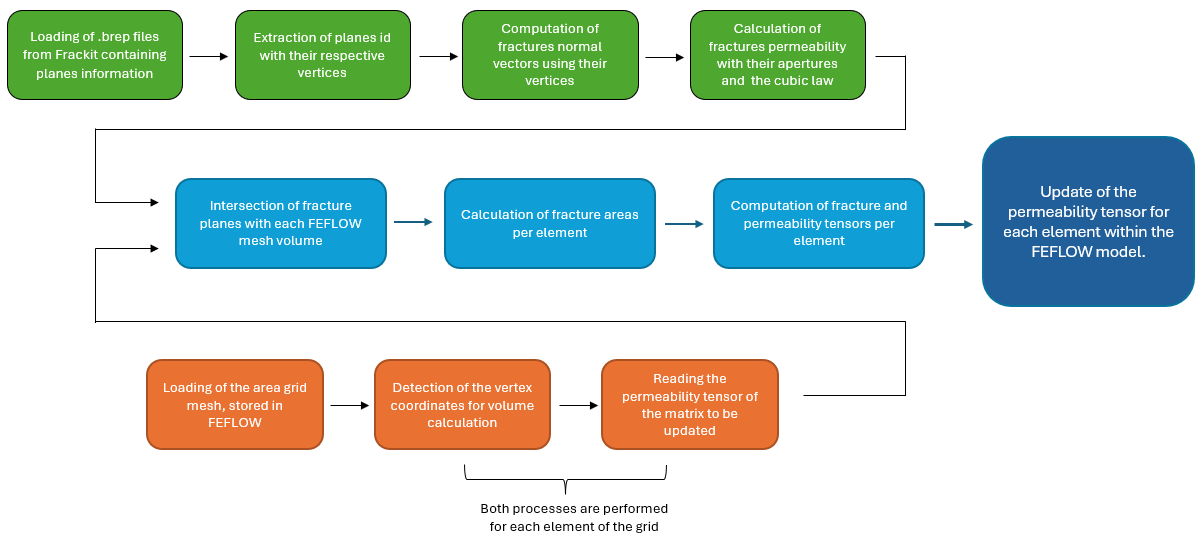

# Reference List

- Banks, D., Odling, N. E., Skarphagen, H., & Rohr‐Torp, E. (1996). Permeability and stress in crystalline rocks. In Terra Nova (Vol. 8, Issue 3, pp. 223–235). Wiley. https://doi.org/10.1111/j.1365-3121.1996.tb00751.x

- Hyman, J. D., Karra, S., Makedonska, N., Gable, C. W., Painter, S. L., & Viswanathan, H. S. (2015). dfnWorks: A discrete fracture network framework for modeling subsurface flow and transport. In Computers &amp; Geosciences (Vol. 84, pp. 10–19). Elsevier BV. https://doi.org/10.1016/j.cageo.2015.08.001

- Jing, L., & Stephansson, O. (2007). Discrete Fracture Network (DFN) Method. In Fundamentals of Discrete Element Methods for Rock Engineering - Theory and Applications (pp. 365–398). Elsevier. https://doi.org/10.1016/s0165-1250(07)85010-3

- Lei, Q., Latham, J.-P., & Tsang, C.-F. (2017). The use of discrete fracture networks for modelling coupled geomechanical and hydrological behaviour of fractured rocks. In Computers and Geotechnics (Vol. 85, pp. 151–176). Elsevier BV. https://doi.org/10.1016/j.compgeo.2016.12.024

- Lianbo, Z., & Xiang-Yang, L. (2009). Fractures in sandstone reservoirs with ultra-low permeability: A case study of the Upper Triassic Yanchang Formation in the Ordos Basin, China. In AAPG Bulletin (Vol. 93, Issue 4, pp. 461–477). American Association of Petroleum Geologists AAPG/Datapages. https://doi.org/10.1306/09240808047

- Viswanathan, H. S., Ajo-Franklin, J.,Birkholzer, J. T., Carey, J. W., Guglielmi,Y., Hyman, J. D., et al. (2022). Fromfluid flow to coupled processes infractured rock: Recent advances andnew frontiers. Reviews of Geophysics,60, e2021RG000744. https://doi.org/10.1029/2021RG000744Received 25 AUG 2021Accepted 20 JAN 202210.1029/2021RG000744REVIEW ARTICLE1 of 65